In [1]:
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout, AveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy, mean_squared_error
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

import itertools

#libraries to help visualize data
import matplotlib.pyplot as plt

#libraries to shuffle image data
import os #used to change directories and make directories
import shutil #used to move image samples from directories
import random #used to shuffle samples
import glob

#import another python file we created

In [4]:
type_1 = ["Bug", "Dark", "Dragon", "Electric", "Fairy", "Fighting", "Fire", "Flying", "Ghost", "Grass", "Ground", "Ice", "Normal", "Poison", "Psychic", "Rock", "Steel", "Water"]
type_2 = ["Bug", "Dark", "Dragon", "Electric", "Fairy", "Fighting", "Fire", "Flying", "Ghost", "Grass", "Ground", "Ice", "None", "Normal", "Poison", "Psychic", "Rock", "Steel", "Water"]

In [5]:
#For the first type water is the largest with 803 files
train_type1 = "CSCI4931_DLFinal-main/Dataset/type1_sorted/train"
test_type1 = "CSCI4931_DLFinal-main/Dataset/type1_sorted/test"

#For the second type none is the largest with 3,649 files
train_type2 = "CSCI4931_DLFinal-main/Dataset/type2_sorted/train"
test_type2 = "CSCI4931_DLFinal-main/Dataset/type2_sorted/test"

In [6]:
# #read in csv file that has number of files in each folder
num_files = pd.read_csv("Num_Types.csv")
# print(num_files["Type1"].loc[0:5])
type1_num = num_files["Type1"]
type2_num = num_files["Type2"] 

# #threshold number to reach when oversampling (only works for 2 model multilabel classification, need to modify if using one model w/ sigmoid)
type1_total = 850
type2_total = 3700

In [180]:
#do image data augmentation to oversample?: https://www.marktechpost.com/2021/04/05/image-data-augmentation-in-keras/
#oversample the data for each train folder
#ONLY RUN THIS CELL ONCE
os.mkdir(train_type1 + "/temp/")

temp_path = train_type1 + "/temp/"

#random oversampling of Pokemon's primary type 
#same process for each type where random sampling of images is generated and moved into specified folder
#process needs to be done so that there are equal distribution of data

#random oversampling for type Bug
bug_needed = type1_total - type1_num.loc[0]
for i in range(0, bug_needed):
    img = random.sample(glob.glob(train_type1 + "/Bug/*"), 1) #only chooses images from bug folder
    parsedString = img[0].split('.')
#     print(parsedString)
    img_name = parsedString[0].split("\\")
#     print(img_name)
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1] #want to save duplicates in separate folder, don't want random sample to choose out of bigger pool that includes duplicates
    #also need to rename duplicates so that they can be saved in the same folder 
#     print(new_img)
    shutil.copy(img[0], new_img) #copy duplicate to temp folder

#https://www.geeksforgeeks.org/how-to-iterate-over-files-in-directory-using-python/
#https://www.tutorialspoint.com/How-to-move-a-file-from-one-folder-to-another-using-Python
dest_folder = train_type1 + "/Bug/"
for dup in os.listdir(temp_path): #iterate through the list of files in the directory chosen
    img_path = os.path.join(temp_path, dup) #combine file name and folder path to create absolute path to file
    if os.path.isfile(img_path): #check if the path is a regular file (not a folder)
#         print(img_path)
        shutil.move(img_path, dest_folder) #move duplicates to designated class/type
    
#random oversampling for type Dark
dark_needed = type1_total - type1_num.loc[1]
for i in range(0, dark_needed):
    img = random.sample(glob.glob(train_type1 + "/Dark/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Dark/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Dragon
dragon_needed = type1_total - type1_num.loc[2]
for i in range(0, dragon_needed):
    img = random.sample(glob.glob(train_type1 + "/Dragon/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Dragon/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Electric
electric_needed = type1_total - type1_num.loc[3]
for i in range(0, electric_needed):
    img = random.sample(glob.glob(train_type1 + "/Electric/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Electric/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Fairy
fairy_needed = type1_total - type1_num.loc[4]
for i in range(0, fairy_needed):
    img = random.sample(glob.glob(train_type1 + "/Fairy/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Fairy/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)
    
#random oversampling for type Fighting
fighting_needed = type1_total - type1_num.loc[5]
for i in range(0, fighting_needed):
    img = random.sample(glob.glob(train_type1 + "/Fighting/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Fighting/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Fire
fire_needed = type1_total - type1_num.loc[6]
for i in range(0, fire_needed):
    img = random.sample(glob.glob(train_type1 + "/Fire/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Fire/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Flying
flying_needed = type1_total - type1_num.loc[7]
for i in range(0, flying_needed):
    img = random.sample(glob.glob(train_type1 + "/Flying/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Flying/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Ghost
ghost_needed = type1_total - type1_num.loc[8]
for i in range(0, ghost_needed):
    img = random.sample(glob.glob(train_type1 + "/Ghost/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Ghost/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Grass
grass_needed = type1_total - type1_num.loc[9]
for i in range(0, grass_needed):
    img = random.sample(glob.glob(train_type1 + "/Grass/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Grass/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Ground
ground_needed = type1_total - type1_num.loc[10]
for i in range(0, ground_needed):
    img = random.sample(glob.glob(train_type1 + "/Ground/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Ground/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Ice
ice_needed = type1_total - type1_num.loc[11]
for i in range(0, ice_needed):
    img = random.sample(glob.glob(train_type1 + "/Ice/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Ice/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Normal
normal_needed = type1_total - type1_num.loc[13]
for i in range(0, normal_needed):
    img = random.sample(glob.glob(train_type1 + "/Normal/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Normal/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Poison
poison_needed = type1_total - type1_num.loc[14]
for i in range(0, poison_needed):
    img = random.sample(glob.glob(train_type1 + "/Poison/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Poison/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Pyschic
psychic_needed = type1_total - type1_num.loc[15]
for i in range(0, psychic_needed):
    img = random.sample(glob.glob(train_type1 + "/Psychic/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Psychic/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)
    
#random oversampling for type Rock
rock_needed = type1_total - type1_num.loc[16]
for i in range(0, rock_needed):
    img = random.sample(glob.glob(train_type1 + "/Rock/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Rock/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Steel
steel_needed = type1_total - type1_num.loc[17]
for i in range(0, steel_needed):
    img = random.sample(glob.glob(train_type1 + "/Steel/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Steel/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Water
water_needed = type1_total - type1_num.loc[18]
for i in range(0, water_needed):
    img = random.sample(glob.glob(train_type1 + "/Water/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type1 + "/Water/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

os.rmdir(temp_path)

In [207]:
#ONLY RUN THIS CELL ONCE
#random oversampling for Pokemon's secondary type
os.mkdir(train_type2 + "/temp/")

temp_path = train_type2 + "/temp/"

#random oversampling for type Bug
bug_needed = type2_total - type2_num.loc[0]
for i in range(0, bug_needed):
    img = random.sample(glob.glob(train_type2 + "/Bug/*"), 1) #only chooses images from bug folder
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1] #want to save duplicates in separate folder, don't want random sample to choose out of bigger pool that includes duplicates
    #also need to rename duplicates so that they can be saved in the same folder 
    shutil.copy(img[0], new_img) #copy duplicate to temp folder

dest_folder = train_type2 + "/Bug/"
for dup in os.listdir(temp_path): #iterate through the list of files in the directory chosen
    img_path = os.path.join(temp_path, dup) #combine file name and folder path to create absolute path to file
    if os.path.isfile(img_path): #check if the path is a regular file (not a folder)
        shutil.move(img_path, dest_folder) #move duplicates to designated class/type
    
#random oversampling for type Dark
dark_needed = type2_total - type2_num.loc[1]
for i in range(0, dark_needed):
    img = random.sample(glob.glob(train_type2 + "/Dark/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Dark/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Dragon
dragon_needed = type2_total - type2_num.loc[2]
for i in range(0, dragon_needed):
    img = random.sample(glob.glob(train_type2 + "/Dragon/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Dragon/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Electric
electric_needed = type2_total - type2_num.loc[3]
for i in range(0, electric_needed):
    img = random.sample(glob.glob(train_type2 + "/Electric/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Electric/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Fairy
fairy_needed = type2_total - type2_num.loc[4]
for i in range(0, fairy_needed):
    img = random.sample(glob.glob(train_type2 + "/Fairy/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Fairy/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)
    
#random oversampling for type Fighting
fighting_needed = type2_total - type2_num.loc[5]
for i in range(0, fighting_needed):
    img = random.sample(glob.glob(train_type2 + "/Fighting/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Fighting/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Fire
fire_needed = type2_total - type2_num.loc[6]
for i in range(0, fire_needed):
    img = random.sample(glob.glob(train_type2 + "/Fire/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Fire/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Flying
flying_needed = type2_total - type2_num.loc[7]
for i in range(0, flying_needed):
    img = random.sample(glob.glob(train_type2 + "/Flying/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Flying/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Ghost
ghost_needed = type2_total - type2_num.loc[8]
for i in range(0, ghost_needed):
    img = random.sample(glob.glob(train_type2 + "/Ghost/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Ghost/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Grass
grass_needed = type2_total - type2_num.loc[9]
for i in range(0, grass_needed):
    img = random.sample(glob.glob(train_type2 + "/Grass/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Grass/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Ground
ground_needed = type2_total - type2_num.loc[10]
for i in range(0, ground_needed):
    img = random.sample(glob.glob(train_type2 + "/Ground/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Ground/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Ice
ice_needed = type2_total - type2_num.loc[11]
for i in range(0, ice_needed):
    img = random.sample(glob.glob(train_type2 + "/Ice/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Ice/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type None
notype_needed = type2_total - type2_num.loc[12]
for i in range(0, notype_needed):
    img = random.sample(glob.glob(train_type2 + "/None/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/None/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Normal
normal_needed = type2_total - type2_num.loc[13]
for i in range(0, normal_needed):
    img = random.sample(glob.glob(train_type2 + "/Normal/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Normal/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Poison
poison_needed = type2_total - type2_num.loc[14]
for i in range(0, poison_needed):
    img = random.sample(glob.glob(train_type2 + "/Poison/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Poison/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Pyschic
psychic_needed = type2_total - type2_num.loc[15]
for i in range(0, psychic_needed):
    img = random.sample(glob.glob(train_type2 + "/Psychic/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Psychic/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)
    
#random oversampling for type Rock
rock_needed = type2_total - type2_num.loc[16]
for i in range(0, rock_needed):
    img = random.sample(glob.glob(train_type2 + "/Rock/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path+ img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Rock/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Steel
steel_needed = type2_total - type2_num.loc[17]
for i in range(0, steel_needed):
    img = random.sample(glob.glob(train_type2 + "/Steel/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Steel/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

#random oversampling for type Water
water_needed = type2_total - type2_num.loc[18]
for i in range(0, water_needed):
    img = random.sample(glob.glob(train_type2 + "/Water/*"), 1)
    parsedString = img[0].split('.')
    img_name = parsedString[0].split("\\")
    new_img = temp_path + img_name[1] + "(" + str(i) + ")." + parsedString[1]
    shutil.copy(img[0], new_img)

dest_folder = train_type2 + "/Water/"
for dup in os.listdir(temp_path):
    img_path = os.path.join(temp_path, dup)
    if os.path.isfile(img_path):
        shutil.move(img_path,dest_folder)

os.rmdir(temp_path)

In [7]:

#data augmentation: https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/
#ImageDataGenerator: https://keras.io/api/preprocessing/image/
#added data augmentation so that the model does not memorize the data
datagen_train = ImageDataGenerator(rotation_range=180,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.4,
                             horizontal_flip=True,
                             vertical_flip=True,
                             validation_split=0.2,
                             preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                            )
datagen_test = ImageDataGenerator(rotation_range=180,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.4,
                             horizontal_flip=True,
                             vertical_flip=True,
                             preprocessing_function=tf.keras.applications.vgg16.preprocess_input
                            )


In [7]:
train_batch = ImageDataGenerator(validation_split=0.2, preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_type1, target_size=(64, 64), classes=type_1, batch_size=50, shuffle=True)
test_batch = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=test_type1, target_size=(64, 64), classes=type_1, batch_size=10, shuffle=False)
#This is for data augmentation. Foramt like this
#train_batch = datagen_train.flow_from_directory(directory=train_type1, target_size=(64, 64), classes=type_1, batch_size=50, shuffle=True)
#test_batch = datagen_test.flow_from_directory(directory=test_type1, target_size=(64, 64), classes=type_1, batch_size=10, shuffle=False)

train_batch2 = ImageDataGenerator(validation_split=0.2, preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
    .flow_from_directory(directory=train_type2, target_size=(64, 64), classes=type_2, batch_size=50, shuffle=True)
test_batch2 = ImageDataGenerator(preprocessing_function=tf.keras.applications.vgg16.preprocess_input)\
   .flow_from_directory(directory=test_type2, target_size=(64, 64), classes=type_2, batch_size=10, shuffle=False)

#train_batch2 = datagen_train.flow_from_directory(directory=train_type2, target_size=(64, 64), classes=type_2, batch_size=50, shuffle=True)
#test_batch2 = datagen_test.flow_from_directory(directory=test_type2, target_size=(64, 64), classes=type_2, batch_size=10, shuffle=False)

Found 15300 images belonging to 18 classes.
Found 1475 images belonging to 18 classes.
Found 70300 images belonging to 19 classes.
Found 6783 images belonging to 19 classes.


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

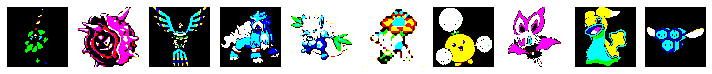

[[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [60]:
#visualize data (function is from tensorflow's website)
imgs, labels = next(train_batch)

def plotImages(arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,20)) #will only show the first 10 images
    axes = axes.flatten()
    for img, label in zip(arr, axes): 
        label.imshow(img)
        label.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs)
print(labels)


C:\Users\Brady\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Cl

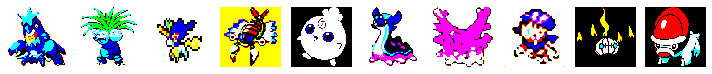

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.

In [61]:
#visualize data (function is from tensorflow's website)
imgs2, labels2 = next(train_batch2)

def plotImages(arr):
    fig, axes = plt.subplots(1, 10, figsize=(10,20)) #will only show the first 10 images
    axes = axes.flatten()
    for img, label in zip(arr, axes): 
        label.imshow(img)
        label.axis('off')
    plt.tight_layout()
    plt.show()

plotImages(imgs2)
print(labels2)

In [214]:
model = Sequential([
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)),
    Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (3,3), strides = 2),
    Dropout(0.2),
    Conv2D(filters = 64, kernel_size = (3, 3),activation = 'relu', padding = 'same'),
    Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (3,3), strides = 2),
    Dropout(0.2),
    Conv2D(filters = 128, kernel_size = (3, 3),activation = 'relu', padding = 'same'),
    Conv2D(filters = 256, kernel_size = (3, 3),activation = 'relu', padding = 'same'),
    Conv2D(filters = 512, kernel_size = (3, 3),activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (3,3), strides = 2),
    Dropout(0.2),
    Flatten(),
    Dense(units = 18, activation = 'softmax'),
])
#definitely need to extend, feels like data is being overfitted?
#Try AveragePooling2d

In [215]:
#model.summary()

In [216]:
model.compile(optimizer = Adam(learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy","mean_squared_error"])

In [217]:
model.fit(x=train_batch, steps_per_epoch = 50, epochs = 600, verbose=1)

Epoch 1/600
50/50 [==============================] - 24s 475ms/step - loss: 7.1406 - accuracy: 0.0762 - mean_squared_error: 0.0683
Epoch 2/600
50/50 [==============================] - 24s 472ms/step - loss: 2.8081 - accuracy: 0.1131 - mean_squared_error: 0.0519
Epoch 3/600
50/50 [==============================] - 24s 471ms/step - loss: 2.6342 - accuracy: 0.1749 - mean_squared_error: 0.0504
Epoch 4/600
50/50 [==============================] - 24s 473ms/step - loss: 2.5222 - accuracy: 0.2138 - mean_squared_error: 0.0493
Epoch 5/600
50/50 [==============================] - 24s 472ms/step - loss: 2.3566 - accuracy: 0.2930 - mean_squared_error: 0.0469
Epoch 6/600
50/50 [==============================] - 24s 475ms/step - loss: 2.2519 - accuracy: 0.3214 - mean_squared_error: 0.0457
Epoch 7/600
50/50 [==============================] - 24s 474ms/step - loss: 2.0865 - accuracy: 0.3599 - mean_squared_error: 0.0432
Epoch 8/600
50/50 [==============================] - 24s 472ms/step - loss: 2.0218 

50/50 [==============================] - 24s 473ms/step - loss: 0.0985 - accuracy: 0.9690 - mean_squared_error: 0.0027
Epoch 64/600
50/50 [==============================] - 24s 474ms/step - loss: 0.1167 - accuracy: 0.9633 - mean_squared_error: 0.0031
Epoch 65/600
50/50 [==============================] - 24s 474ms/step - loss: 0.0920 - accuracy: 0.9733 - mean_squared_error: 0.0024
Epoch 66/600
50/50 [==============================] - 24s 473ms/step - loss: 0.0911 - accuracy: 0.9673 - mean_squared_error: 0.0026
Epoch 67/600
50/50 [==============================] - 24s 475ms/step - loss: 0.0798 - accuracy: 0.9725 - mean_squared_error: 0.0023
Epoch 68/600
50/50 [==============================] - 24s 474ms/step - loss: 0.0862 - accuracy: 0.9713 - mean_squared_error: 0.0025
Epoch 69/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0912 - accuracy: 0.9713 - mean_squared_error: 0.0025
Epoch 70/600
50/50 [==============================] - 24s 475ms/step - loss: 0.0714 - acc

50/50 [==============================] - 24s 475ms/step - loss: 0.0410 - accuracy: 0.9846 - mean_squared_error: 0.0012
Epoch 125/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0597 - accuracy: 0.9816 - mean_squared_error: 0.0016
Epoch 126/600
50/50 [==============================] - 24s 474ms/step - loss: 0.0503 - accuracy: 0.9876 - mean_squared_error: 0.0013
Epoch 127/600
50/50 [==============================] - 24s 475ms/step - loss: 0.0750 - accuracy: 0.9791 - mean_squared_error: 0.0019
Epoch 128/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0531 - accuracy: 0.9807 - mean_squared_error: 0.0016
Epoch 129/600
50/50 [==============================] - 24s 474ms/step - loss: 0.0443 - accuracy: 0.9835 - mean_squared_error: 0.0013
Epoch 130/600
50/50 [==============================] - 24s 480ms/step - loss: 0.0341 - accuracy: 0.9887 - mean_squared_error: 9.9562e-04
Epoch 131/600
50/50 [==============================] - 24s 476ms/step - loss: 0

50/50 [==============================] - 24s 475ms/step - loss: 0.0227 - accuracy: 0.9923 - mean_squared_error: 6.2595e-04
Epoch 185/600
50/50 [==============================] - 24s 473ms/step - loss: 0.0144 - accuracy: 0.9961 - mean_squared_error: 4.3568e-04
Epoch 186/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0093 - accuracy: 0.9964 - mean_squared_error: 2.6008e-04
Epoch 187/600
50/50 [==============================] - 24s 473ms/step - loss: 0.0215 - accuracy: 0.9930 - mean_squared_error: 5.0890e-04
Epoch 188/600
50/50 [==============================] - 24s 473ms/step - loss: 0.0166 - accuracy: 0.9955 - mean_squared_error: 4.3710e-04
Epoch 189/600
50/50 [==============================] - 24s 472ms/step - loss: 0.0381 - accuracy: 0.9870 - mean_squared_error: 0.0011
Epoch 190/600
50/50 [==============================] - 24s 472ms/step - loss: 0.0460 - accuracy: 0.9869 - mean_squared_error: 0.0012
Epoch 191/600
50/50 [==============================] - 24s 474m

50/50 [==============================] - 24s 474ms/step - loss: 0.0266 - accuracy: 0.9917 - mean_squared_error: 7.4611e-04
Epoch 245/600
50/50 [==============================] - 24s 474ms/step - loss: 0.0348 - accuracy: 0.9910 - mean_squared_error: 8.0342e-04
Epoch 246/600
50/50 [==============================] - 24s 475ms/step - loss: 0.0312 - accuracy: 0.9911 - mean_squared_error: 8.3765e-04
Epoch 247/600
50/50 [==============================] - 24s 474ms/step - loss: 0.0227 - accuracy: 0.9940 - mean_squared_error: 6.1574e-04
Epoch 248/600
50/50 [==============================] - 24s 478ms/step - loss: 0.0394 - accuracy: 0.9871 - mean_squared_error: 0.0011
Epoch 249/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0209 - accuracy: 0.9912 - mean_squared_error: 6.4930e-04
Epoch 250/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0172 - accuracy: 0.9944 - mean_squared_error: 4.3256e-04
Epoch 251/600
50/50 [==============================] - 24s 

Epoch 304/600
50/50 [==============================] - 24s 477ms/step - loss: 0.0168 - accuracy: 0.9944 - mean_squared_error: 4.2308e-04
Epoch 305/600
50/50 [==============================] - 24s 478ms/step - loss: 0.0077 - accuracy: 0.9978 - mean_squared_error: 2.2078e-04
Epoch 306/600
50/50 [==============================] - 24s 475ms/step - loss: 0.0136 - accuracy: 0.9947 - mean_squared_error: 4.4611e-04
Epoch 307/600
50/50 [==============================] - 24s 477ms/step - loss: 0.0247 - accuracy: 0.9943 - mean_squared_error: 6.1602e-04
Epoch 308/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0214 - accuracy: 0.9923 - mean_squared_error: 6.3211e-04
Epoch 309/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0250 - accuracy: 0.9948 - mean_squared_error: 5.4205e-04
Epoch 310/600
50/50 [==============================] - 24s 477ms/step - loss: 0.0116 - accuracy: 0.9967 - mean_squared_error: 3.1877e-04
Epoch 311/600
50/50 [====================

50/50 [==============================] - 24s 477ms/step - loss: 0.0043 - accuracy: 0.9985 - mean_squared_error: 1.1756e-04
Epoch 364/600
50/50 [==============================] - 24s 477ms/step - loss: 0.0066 - accuracy: 0.9972 - mean_squared_error: 2.1156e-04
Epoch 365/600
50/50 [==============================] - 24s 477ms/step - loss: 0.0123 - accuracy: 0.9986 - mean_squared_error: 1.8576e-04
Epoch 366/600
50/50 [==============================] - 24s 474ms/step - loss: 0.0049 - accuracy: 0.9986 - mean_squared_error: 1.3030e-04
Epoch 367/600
50/50 [==============================] - 24s 477ms/step - loss: 0.0073 - accuracy: 0.9976 - mean_squared_error: 2.3202e-04
Epoch 368/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0155 - accuracy: 0.9949 - mean_squared_error: 4.3356e-04
Epoch 369/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0148 - accuracy: 0.9956 - mean_squared_error: 3.8401e-04
Epoch 370/600
50/50 [==============================] - 

50/50 [==============================] - 24s 474ms/step - loss: 0.0215 - accuracy: 0.9917 - mean_squared_error: 6.8925e-04
Epoch 423/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0183 - accuracy: 0.9933 - mean_squared_error: 5.4181e-04
Epoch 424/600
50/50 [==============================] - 24s 473ms/step - loss: 0.0132 - accuracy: 0.9962 - mean_squared_error: 3.4019e-04
Epoch 425/600
50/50 [==============================] - 24s 474ms/step - loss: 0.0163 - accuracy: 0.9958 - mean_squared_error: 3.6542e-04
Epoch 426/600
50/50 [==============================] - 24s 474ms/step - loss: 0.0108 - accuracy: 0.9951 - mean_squared_error: 3.6122e-04
Epoch 427/600
50/50 [==============================] - 24s 474ms/step - loss: 0.0169 - accuracy: 0.9961 - mean_squared_error: 2.5584e-04
Epoch 428/600
50/50 [==============================] - 24s 473ms/step - loss: 0.0061 - accuracy: 0.9982 - mean_squared_error: 1.7218e-04
Epoch 429/600
50/50 [==============================] - 

50/50 [==============================] - 24s 477ms/step - loss: 0.0208 - accuracy: 0.9943 - mean_squared_error: 5.6511e-04
Epoch 482/600
50/50 [==============================] - 24s 481ms/step - loss: 0.0187 - accuracy: 0.9940 - mean_squared_error: 4.9618e-04
Epoch 483/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0055 - accuracy: 0.9984 - mean_squared_error: 1.5955e-04
Epoch 484/600
50/50 [==============================] - 24s 481ms/step - loss: 0.0077 - accuracy: 0.9978 - mean_squared_error: 2.3559e-04
Epoch 485/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0125 - accuracy: 0.9958 - mean_squared_error: 3.6702e-04
Epoch 486/600
50/50 [==============================] - 24s 473ms/step - loss: 0.0144 - accuracy: 0.9958 - mean_squared_error: 3.8450e-04
Epoch 487/600
50/50 [==============================] - 24s 480ms/step - loss: 0.0073 - accuracy: 0.9969 - mean_squared_error: 2.3285e-04
Epoch 488/600
50/50 [==============================] - 

50/50 [==============================] - 24s 477ms/step - loss: 0.0071 - accuracy: 0.9961 - mean_squared_error: 2.4156e-04
Epoch 541/600
50/50 [==============================] - 24s 477ms/step - loss: 0.0077 - accuracy: 0.9985 - mean_squared_error: 1.6428e-04
Epoch 542/600
50/50 [==============================] - 24s 475ms/step - loss: 0.0020 - accuracy: 0.9994 - mean_squared_error: 5.5252e-05
Epoch 543/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0023 - accuracy: 0.9989 - mean_squared_error: 6.0603e-05
Epoch 544/600
50/50 [==============================] - 24s 475ms/step - loss: 7.7837e-04 - accuracy: 0.9999 - mean_squared_error: 1.4506e-05
Epoch 545/600
50/50 [==============================] - 24s 475ms/step - loss: 0.0058 - accuracy: 0.9987 - mean_squared_error: 1.5389e-04
Epoch 546/600
50/50 [==============================] - 24s 476ms/step - loss: 0.0173 - accuracy: 0.9961 - mean_squared_error: 4.1580e-04
Epoch 547/600
50/50 [==============================

50/50 [==============================] - 24s 475ms/step - loss: 0.0142 - accuracy: 0.9944 - mean_squared_error: 4.2214e-04
Epoch 600/600
50/50 [==============================] - 24s 475ms/step - loss: 0.0126 - accuracy: 0.9967 - mean_squared_error: 3.1222e-04


In [218]:
model2 = Sequential([
    Conv2D(filters = 32, kernel_size = (4, 4), activation = 'relu', padding = 'same', input_shape = (64, 64, 3)),
    Conv2D(filters = 32, kernel_size = (4, 4), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Dropout(0.5),
    Conv2D(filters = 64, kernel_size = (4, 4), activation = 'relu', padding = 'same'),
    Conv2D(filters = 64, kernel_size = (4, 4), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Dropout(0.5),
    Conv2D(filters = 128, kernel_size = (4, 4), activation = 'relu', padding = 'same'),
    Conv2D(filters = 256, kernel_size = (4, 4), activation = 'relu', padding = 'same'),
    Conv2D(filters = 512, kernel_size = (4, 4), activation = 'relu', padding = 'same'),
    MaxPool2D(pool_size = (2,2), strides = 2),
    Dropout(0.5),
    Flatten(),
    Dense(units = 19, activation = 'softmax'),
])
#definitely need to extend, feels like data is being overfitted?

In [219]:
model2.compile(optimizer = Adam(learning_rate = 0.0001), loss = "categorical_crossentropy", metrics = ["accuracy","mean_squared_error"])

In [220]:
model2.fit(x=train_batch2, steps_per_epoch = 50, epochs=600, verbose=1)

Epoch 1/600


C:\Users\Brady\Anaconda3\lib\site-packages\PIL\Image.py:989: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


50/50 [==============================] - 42s 835ms/step - loss: 11.3596 - accuracy: 0.0529 - mean_squared_error: 0.0722
Epoch 2/600
50/50 [==============================] - 42s 832ms/step - loss: 3.0184 - accuracy: 0.0567 - mean_squared_error: 0.0503
Epoch 3/600
50/50 [==============================] - 42s 833ms/step - loss: 2.9931 - accuracy: 0.0564 - mean_squared_error: 0.0502
Epoch 4/600
50/50 [==============================] - 42s 832ms/step - loss: 2.9607 - accuracy: 0.0619 - mean_squared_error: 0.0500
Epoch 5/600
50/50 [==============================] - 42s 835ms/step - loss: 2.9438 - accuracy: 0.0703 - mean_squared_error: 0.0499
Epoch 6/600
50/50 [==============================] - 42s 836ms/step - loss: 2.9330 - accuracy: 0.0630 - mean_squared_error: 0.0498
Epoch 7/600
50/50 [==============================] - 42s 840ms/step - loss: 2.8856 - accuracy: 0.1075 - mean_squared_error: 0.0495
Epoch 8/600
50/50 [==============================] - 42s 842ms/step - loss: 2.8478 - accuracy:

50/50 [==============================] - 42s 841ms/step - loss: 0.2861 - accuracy: 0.9110 - mean_squared_error: 0.0069
Epoch 64/600
50/50 [==============================] - 42s 844ms/step - loss: 0.2456 - accuracy: 0.9256 - mean_squared_error: 0.0059
Epoch 65/600
50/50 [==============================] - 42s 840ms/step - loss: 0.2528 - accuracy: 0.9203 - mean_squared_error: 0.0060
Epoch 66/600
50/50 [==============================] - 42s 842ms/step - loss: 0.2479 - accuracy: 0.9286 - mean_squared_error: 0.0059
Epoch 67/600
50/50 [==============================] - 42s 842ms/step - loss: 0.2386 - accuracy: 0.9272 - mean_squared_error: 0.0057
Epoch 68/600
50/50 [==============================] - 42s 840ms/step - loss: 0.2841 - accuracy: 0.9177 - mean_squared_error: 0.0066
Epoch 69/600
50/50 [==============================] - 42s 839ms/step - loss: 0.2013 - accuracy: 0.9358 - mean_squared_error: 0.0050
Epoch 70/600
50/50 [==============================] - 42s 839ms/step - loss: 0.2265 - acc

Epoch 125/600
50/50 [==============================] - 42s 845ms/step - loss: 0.0885 - accuracy: 0.9704 - mean_squared_error: 0.0022
Epoch 126/600
50/50 [==============================] - 42s 844ms/step - loss: 0.0697 - accuracy: 0.9756 - mean_squared_error: 0.0018
Epoch 127/600
50/50 [==============================] - 42s 846ms/step - loss: 0.1085 - accuracy: 0.9648 - mean_squared_error: 0.0028
Epoch 128/600
50/50 [==============================] - 42s 846ms/step - loss: 0.0879 - accuracy: 0.9704 - mean_squared_error: 0.0023
Epoch 129/600
50/50 [==============================] - 42s 845ms/step - loss: 0.0847 - accuracy: 0.9701 - mean_squared_error: 0.0022
Epoch 130/600
50/50 [==============================] - 42s 845ms/step - loss: 0.0971 - accuracy: 0.9661 - mean_squared_error: 0.0026
Epoch 131/600
50/50 [==============================] - 42s 847ms/step - loss: 0.0927 - accuracy: 0.9713 - mean_squared_error: 0.0023
Epoch 132/600
50/50 [==============================] - 42s 845ms/step

50/50 [==============================] - 42s 845ms/step - loss: 0.0594 - accuracy: 0.9839 - mean_squared_error: 0.0014
Epoch 187/600
50/50 [==============================] - 42s 842ms/step - loss: 0.0731 - accuracy: 0.9801 - mean_squared_error: 0.0018
Epoch 188/600
50/50 [==============================] - 43s 850ms/step - loss: 0.0609 - accuracy: 0.9864 - mean_squared_error: 0.0014
Epoch 189/600
50/50 [==============================] - 42s 845ms/step - loss: 0.0557 - accuracy: 0.9823 - mean_squared_error: 0.0014
Epoch 190/600
50/50 [==============================] - 42s 843ms/step - loss: 0.0546 - accuracy: 0.9825 - mean_squared_error: 0.0015
Epoch 191/600
50/50 [==============================] - 42s 845ms/step - loss: 0.0594 - accuracy: 0.9818 - mean_squared_error: 0.0015
Epoch 192/600
50/50 [==============================] - 42s 843ms/step - loss: 0.0622 - accuracy: 0.9780 - mean_squared_error: 0.0017
Epoch 193/600
50/50 [==============================] - 42s 842ms/step - loss: 0.044

50/50 [==============================] - 42s 849ms/step - loss: 0.0239 - accuracy: 0.9922 - mean_squared_error: 5.9670e-04
Epoch 248/600
50/50 [==============================] - 42s 841ms/step - loss: 0.0484 - accuracy: 0.9872 - mean_squared_error: 0.0011
Epoch 249/600
50/50 [==============================] - 42s 841ms/step - loss: 0.0458 - accuracy: 0.9837 - mean_squared_error: 0.0013
Epoch 250/600
50/50 [==============================] - 42s 841ms/step - loss: 0.0311 - accuracy: 0.9925 - mean_squared_error: 7.5097e-04
Epoch 251/600
50/50 [==============================] - 42s 840ms/step - loss: 0.0560 - accuracy: 0.9832 - mean_squared_error: 0.0015
Epoch 252/600
50/50 [==============================] - 42s 846ms/step - loss: 0.0353 - accuracy: 0.9875 - mean_squared_error: 9.2798e-04
Epoch 253/600
50/50 [==============================] - 42s 842ms/step - loss: 0.0690 - accuracy: 0.9879 - mean_squared_error: 0.0013
Epoch 254/600
50/50 [==============================] - 42s 843ms/step -

50/50 [==============================] - 42s 841ms/step - loss: 0.0384 - accuracy: 0.9868 - mean_squared_error: 0.0011
Epoch 308/600
50/50 [==============================] - 42s 842ms/step - loss: 0.0481 - accuracy: 0.9862 - mean_squared_error: 0.0011
Epoch 309/600
50/50 [==============================] - 42s 842ms/step - loss: 0.0196 - accuracy: 0.9927 - mean_squared_error: 5.3980e-04
Epoch 310/600
50/50 [==============================] - 42s 842ms/step - loss: 0.0357 - accuracy: 0.9931 - mean_squared_error: 7.7550e-04
Epoch 311/600
50/50 [==============================] - 42s 839ms/step - loss: 0.0285 - accuracy: 0.9898 - mean_squared_error: 7.1991e-04
Epoch 312/600
50/50 [==============================] - 42s 845ms/step - loss: 0.0341 - accuracy: 0.9864 - mean_squared_error: 0.0010
Epoch 313/600
50/50 [==============================] - 42s 842ms/step - loss: 0.0316 - accuracy: 0.9857 - mean_squared_error: 0.0010
Epoch 314/600
50/50 [==============================] - 42s 842ms/step -

50/50 [==============================] - 43s 852ms/step - loss: 0.0198 - accuracy: 0.9943 - mean_squared_error: 5.3336e-04
Epoch 368/600
50/50 [==============================] - 42s 841ms/step - loss: 0.0231 - accuracy: 0.9896 - mean_squared_error: 7.0791e-04
Epoch 369/600
50/50 [==============================] - 42s 841ms/step - loss: 0.0252 - accuracy: 0.9917 - mean_squared_error: 6.9156e-04
Epoch 370/600
50/50 [==============================] - 42s 842ms/step - loss: 0.0414 - accuracy: 0.9864 - mean_squared_error: 0.0011
Epoch 371/600
50/50 [==============================] - 42s 839ms/step - loss: 0.0190 - accuracy: 0.9935 - mean_squared_error: 5.0065e-04
Epoch 372/600
50/50 [==============================] - 42s 839ms/step - loss: 0.0106 - accuracy: 0.9964 - mean_squared_error: 2.7578e-04
Epoch 373/600
50/50 [==============================] - 42s 844ms/step - loss: 0.0320 - accuracy: 0.9915 - mean_squared_error: 8.1436e-04
Epoch 374/600
50/50 [==============================] - 42s 

50/50 [==============================] - 42s 841ms/step - loss: 0.0137 - accuracy: 0.9940 - mean_squared_error: 3.9842e-04
Epoch 428/600
50/50 [==============================] - 42s 843ms/step - loss: 0.0298 - accuracy: 0.9910 - mean_squared_error: 7.8546e-04
Epoch 429/600
50/50 [==============================] - 42s 841ms/step - loss: 0.0287 - accuracy: 0.9922 - mean_squared_error: 7.4051e-04
Epoch 430/600
50/50 [==============================] - 42s 845ms/step - loss: 0.0154 - accuracy: 0.9939 - mean_squared_error: 4.8804e-04
Epoch 431/600
50/50 [==============================] - 42s 842ms/step - loss: 0.0163 - accuracy: 0.9929 - mean_squared_error: 5.0261e-04
Epoch 432/600
50/50 [==============================] - 42s 843ms/step - loss: 0.0194 - accuracy: 0.9926 - mean_squared_error: 5.6884e-04
Epoch 433/600
50/50 [==============================] - 42s 841ms/step - loss: 0.0417 - accuracy: 0.9891 - mean_squared_error: 9.5130e-04
Epoch 434/600
50/50 [==============================] - 

50/50 [==============================] - 42s 842ms/step - loss: 0.0326 - accuracy: 0.9914 - mean_squared_error: 8.1669e-04
Epoch 487/600
50/50 [==============================] - 42s 842ms/step - loss: 0.0213 - accuracy: 0.9907 - mean_squared_error: 6.0783e-04
Epoch 488/600
50/50 [==============================] - 42s 842ms/step - loss: 0.0133 - accuracy: 0.9944 - mean_squared_error: 3.9310e-04
Epoch 489/600
50/50 [==============================] - 42s 842ms/step - loss: 0.0248 - accuracy: 0.9923 - mean_squared_error: 5.9310e-04
Epoch 490/600
50/50 [==============================] - 42s 841ms/step - loss: 0.0275 - accuracy: 0.9905 - mean_squared_error: 7.9694e-04
Epoch 491/600
50/50 [==============================] - 42s 842ms/step - loss: 0.0255 - accuracy: 0.9912 - mean_squared_error: 6.9634e-04
Epoch 492/600
50/50 [==============================] - 42s 844ms/step - loss: 0.0418 - accuracy: 0.9916 - mean_squared_error: 9.2715e-04
Epoch 493/600
50/50 [==============================] - 

50/50 [==============================] - 42s 842ms/step - loss: 0.0097 - accuracy: 0.9958 - mean_squared_error: 3.0321e-04
Epoch 546/600
50/50 [==============================] - 42s 840ms/step - loss: 0.0135 - accuracy: 0.9953 - mean_squared_error: 3.6385e-04
Epoch 547/600
50/50 [==============================] - 42s 839ms/step - loss: 0.0178 - accuracy: 0.9949 - mean_squared_error: 3.9557e-04
Epoch 548/600
50/50 [==============================] - 42s 840ms/step - loss: 0.0142 - accuracy: 0.9970 - mean_squared_error: 3.2010e-04
Epoch 549/600
50/50 [==============================] - 42s 844ms/step - loss: 0.0147 - accuracy: 0.9948 - mean_squared_error: 4.2009e-04
Epoch 550/600
50/50 [==============================] - 42s 842ms/step - loss: 0.0186 - accuracy: 0.9924 - mean_squared_error: 5.3283e-04
Epoch 551/600
50/50 [==============================] - 42s 841ms/step - loss: 0.0092 - accuracy: 0.9971 - mean_squared_error: 2.4982e-04
Epoch 552/600
50/50 [==============================] - 

In [221]:
output = model.predict(test_batch)
output

array([[3.35e-01, 3.63e-08, 2.60e-07, ..., 5.11e-07, 3.74e-10, 6.07e-01],
       [3.61e-03, 8.82e-06, 2.06e-10, ..., 7.70e-01, 1.66e-10, 2.77e-09],
       [1.13e-02, 7.44e-07, 9.71e-09, ..., 1.58e-05, 5.00e-02, 7.49e-01],
       ...,
       [4.02e-18, 4.17e-15, 2.84e-18, ..., 5.90e-14, 1.74e-08, 1.00e+00],
       [1.04e-08, 2.81e-11, 2.72e-08, ..., 1.14e-15, 9.40e-11, 1.00e+00],
       [5.22e-07, 1.28e-12, 1.26e-14, ..., 5.04e-07, 7.94e-13, 1.38e-07]],
      dtype=float32)

In [222]:
output2 = model2.predict(test_batch2)
output2

array([[1.22e-06, 2.04e-05, 7.42e-06, ..., 9.55e-07, 9.40e-01, 5.93e-12],
       [9.91e-01, 6.56e-09, 2.92e-09, ..., 3.51e-09, 1.51e-12, 1.71e-11],
       [1.00e+00, 4.27e-14, 1.42e-13, ..., 2.64e-13, 1.89e-12, 3.54e-15],
       ...,
       [6.47e-21, 4.52e-16, 3.67e-15, ..., 7.91e-15, 1.39e-17, 1.00e+00],
       [9.12e-20, 2.75e-10, 9.71e-12, ..., 1.03e-08, 1.83e-10, 1.00e+00],
       [1.38e-21, 5.35e-14, 9.37e-17, ..., 1.20e-13, 4.55e-12, 1.00e+00]],
      dtype=float32)

In [223]:
prediction = []
prediction2 = []

In [224]:
def getType(pokemon):
    return np.argmax(pokemon)

In [225]:
for x in range(0,len(output)):
    prediction.append(getType(output[x]))
    
for x in range(0, len(output2)):
    prediction2.append(getType(output2[x]))

In [226]:
def test_accuracy(prediction, real):
    correct = 0
    if len(prediction) != len(real):
        print("Error")
        return 0
    for x in range(0, len(prediction)):
        if prediction[x] == real[x]:
            correct += 1
    print(100 * (correct / len(prediction)))

print("Type 1 accuracy:")
test_accuracy(prediction,test_batch.labels)
print("Type 2 accuracy:")
test_accuracy(prediction2,test_batch2.labels)

Type 1 accuracy:
65.5593220338983
Type 2 accuracy:
88.55963438006782


In [227]:
cm = confusion_matrix(test_batch.labels,prediction)
np.set_printoptions(precision = 2)
cm2 = confusion_matrix(test_batch2.labels,prediction2)

In [228]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

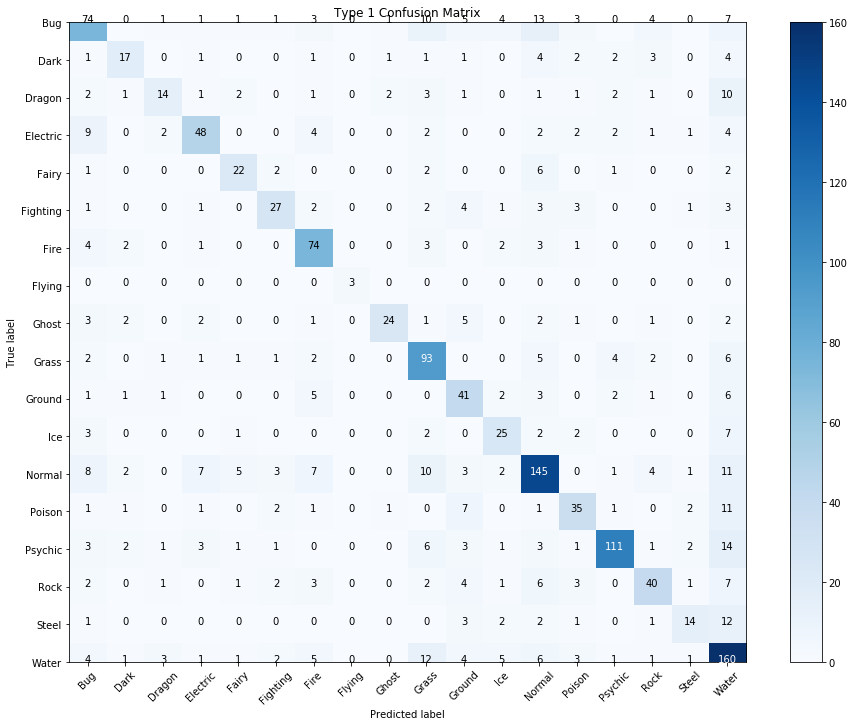

In [229]:
plt.figure(figsize = [13,10])
plot_confusion_matrix(cm, classes = type_1, title = "Type 1 Confusion Matrix")

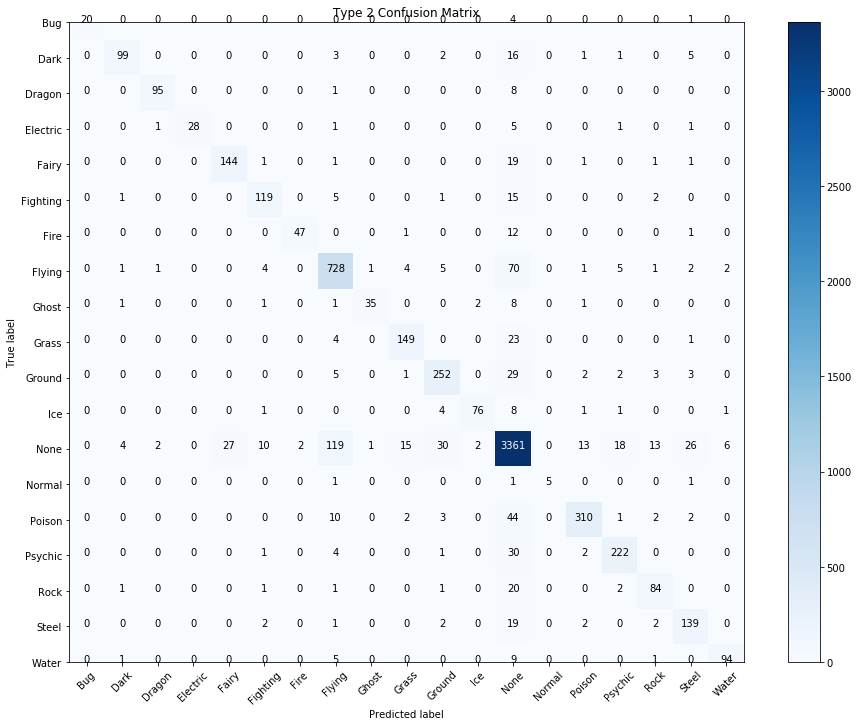

In [230]:
plt.figure(figsize = [13,10])
plot_confusion_matrix(cm2, classes = type_2, title = "Type 2 Confusion Matrix")